# importing required libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../Data/bank-additional/bank-additional-full.csv", delimiter=";")

### getting a broad understanding of the database structure

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

From initial inspection, it looks like there are no NA values in this dataset.

### Duplicates
Let us see if there are any duplicates in the dataset that can be removed.

In [8]:
df2 = df[df.duplicated(keep=False)]

In [9]:
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


Looks like there are 12 duplicates in the dataset as shown by the 24 instances where each second instance is recurring.

For redundancy sake, I will remove the data that is duplicated.

In [10]:
df = df.drop_duplicates(keep='first')

In [11]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Categorical data

Let's check whether there is any spelling errors or any entries in the data which could skew the results while building models.

In [12]:
df['job'].unique().tolist()

['housemaid',
 'services',
 'admin.',
 'blue-collar',
 'technician',
 'retired',
 'management',
 'unemployed',
 'self-employed',
 'unknown',
 'entrepreneur',
 'student']

In [13]:
df['marital'].unique().tolist()

['married', 'single', 'divorced', 'unknown']

In [14]:
df['education'].unique().tolist()

['basic.4y',
 'high.school',
 'basic.6y',
 'basic.9y',
 'professional.course',
 'unknown',
 'university.degree',
 'illiterate']

In [15]:
df['default'].unique().tolist()

['no', 'unknown', 'yes']

In [16]:
df['housing'].unique().tolist()

['no', 'yes', 'unknown']

In [17]:
df['loan'].unique().tolist()

['no', 'yes', 'unknown']

In [18]:
df['contact'].unique().tolist()

['telephone', 'cellular']

In [19]:
df['month'].unique().tolist()

['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']

In [20]:
df['day_of_week'].unique().tolist()

['mon', 'tue', 'wed', 'thu', 'fri']

In [21]:
df['poutcome'].unique().tolist()

['nonexistent', 'failure', 'success']

In [22]:
df['y'].unique().tolist()

['no', 'yes']

Upon checking for unique values in all the features, there appear to be no mistakes in the dataset.

However, not all the categories that are expected to be in the data are present, e.g. 'month' does not contain the months 'jan' & 'feb'

### Checking the distribution of numerical data

In [23]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


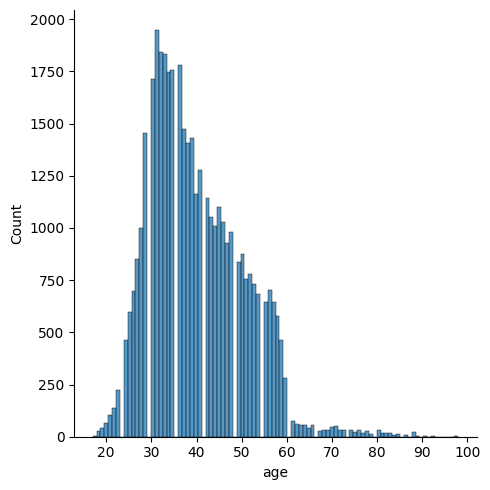

In [24]:
sns.displot(df['age'])

<Axes: ylabel='age'>

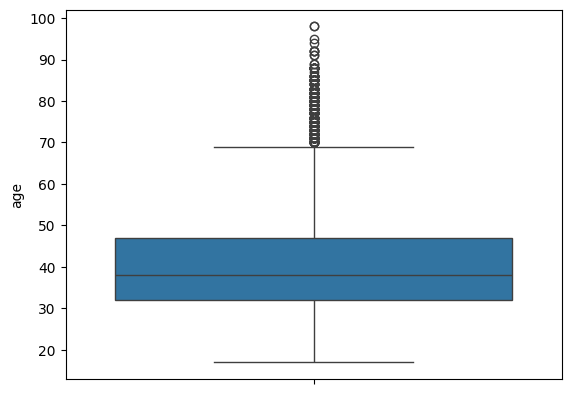

In [25]:
sns.boxplot(df['age'])

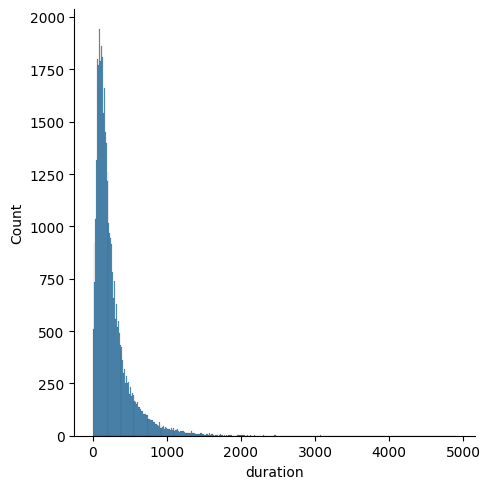

In [26]:
sns.displot(df['duration'])

<Axes: ylabel='duration'>

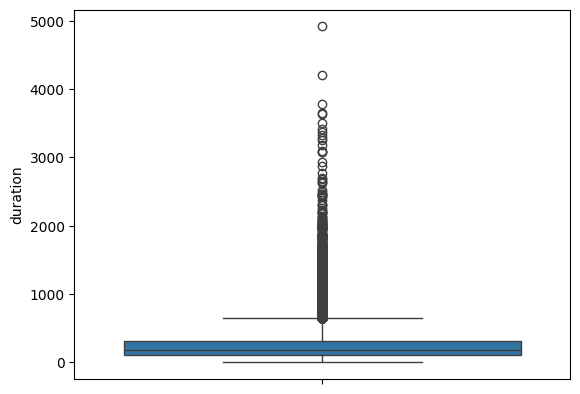

In [27]:
sns.boxplot(df['duration'])

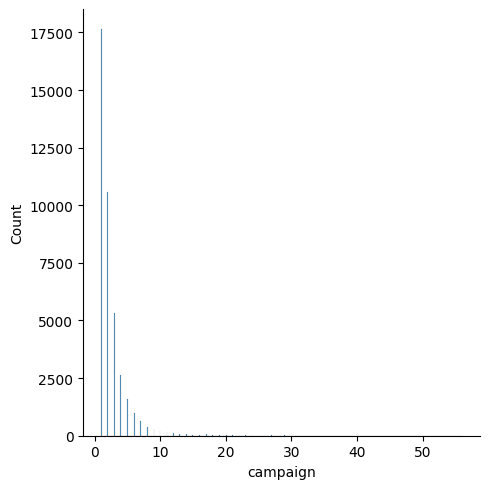

In [28]:
sns.displot(df['campaign'])

<Axes: ylabel='campaign'>

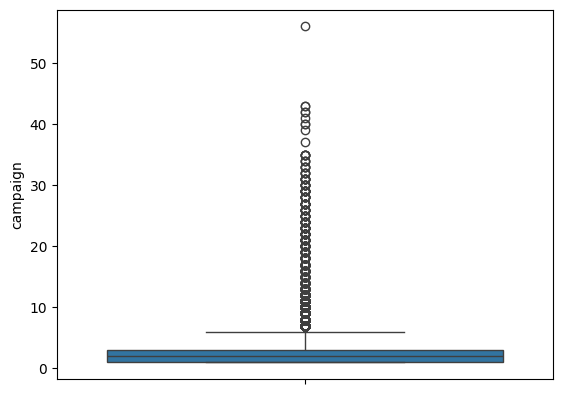

In [29]:
sns.boxplot(df['campaign'])

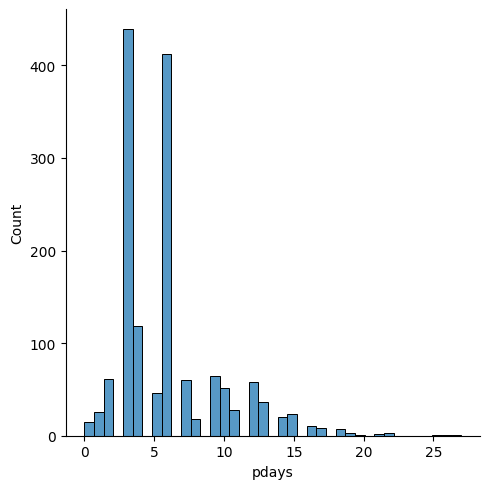

In [30]:
# removing clients who were not contacted previously (999 value)
mask = df['pdays'] == 999
new_df = df[~mask]
sns.displot(new_df['pdays'])

<Axes: ylabel='pdays'>

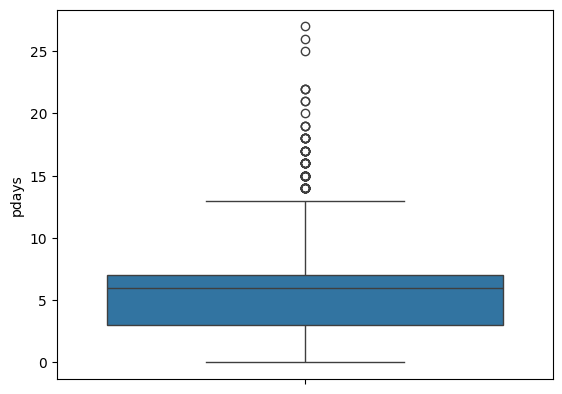

In [31]:
# removing clients who were not contacted previously (999 value)
mask = df['pdays'] == 999
new_df = df[~mask]
sns.boxplot(new_df['pdays'])

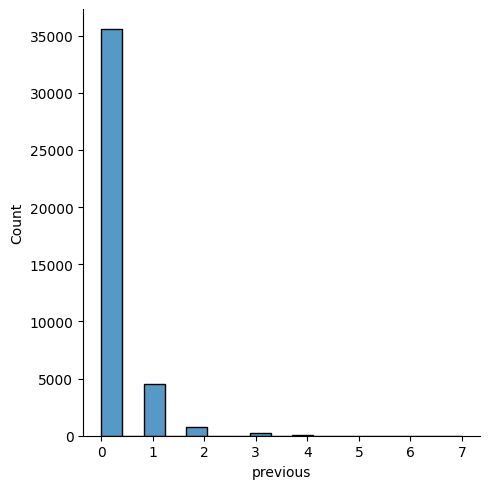

In [32]:
sns.displot(df['previous'])

<Axes: ylabel='previous'>

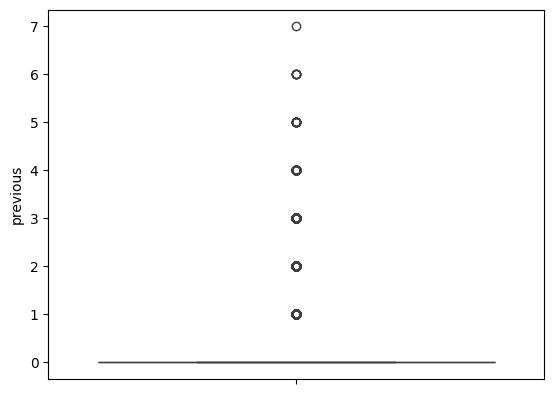

In [33]:
sns.boxplot(df['previous'])

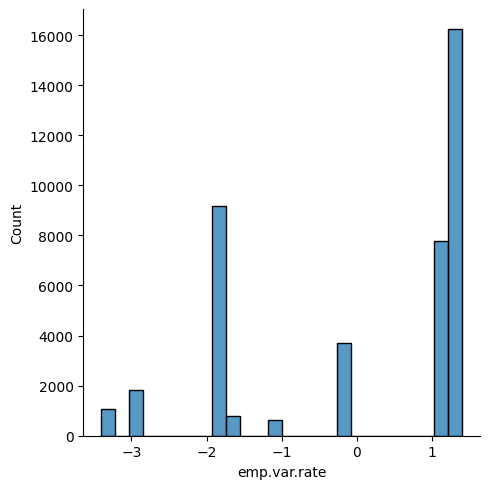

In [34]:
sns.displot(df['emp.var.rate'])

<Axes: ylabel='emp.var.rate'>

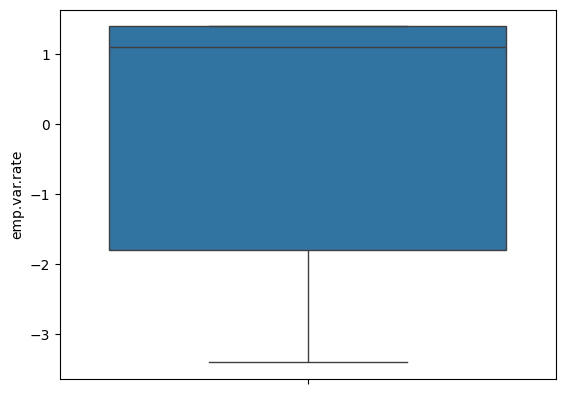

In [35]:
sns.boxplot(df['emp.var.rate'])

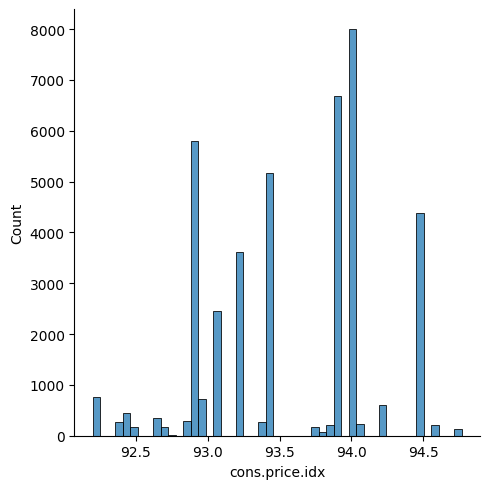

In [36]:
sns.displot(df['cons.price.idx'])

<Axes: ylabel='cons.price.idx'>

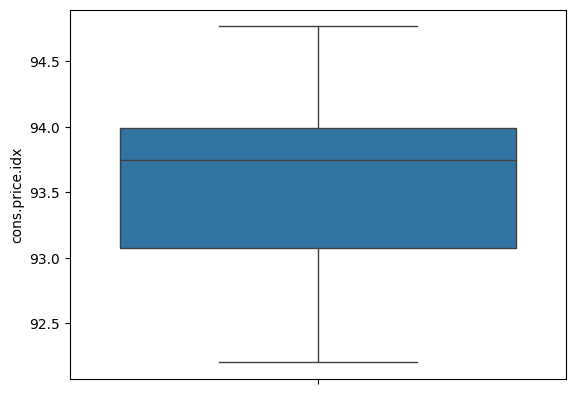

In [37]:
sns.boxplot(df['cons.price.idx'])

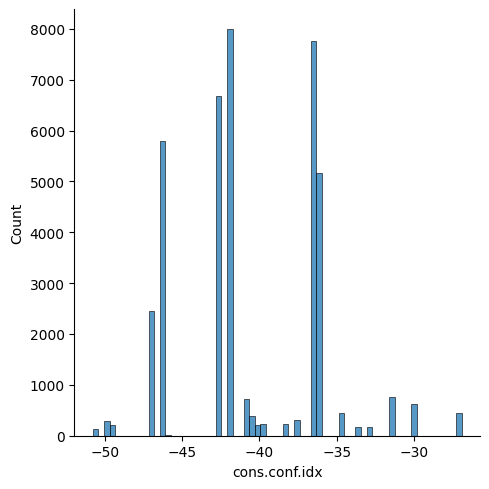

In [38]:
sns.displot(df['cons.conf.idx'])

<Axes: ylabel='cons.conf.idx'>

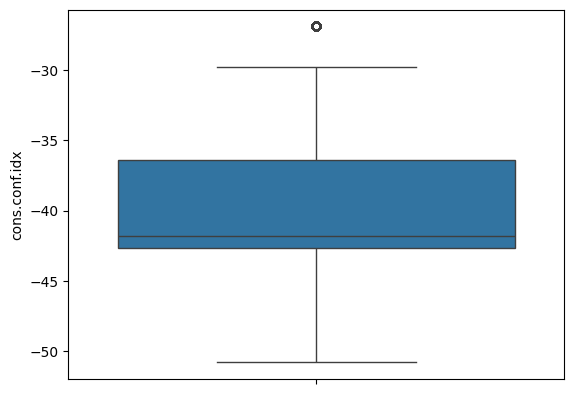

In [39]:
sns.boxplot(df['cons.conf.idx'])

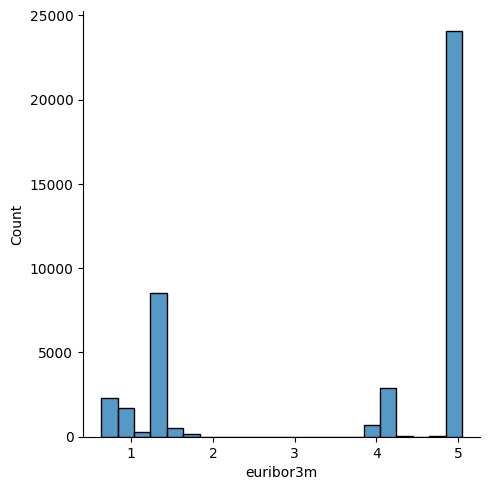

In [40]:
sns.displot(df['euribor3m'])

<Axes: ylabel='euribor3m'>

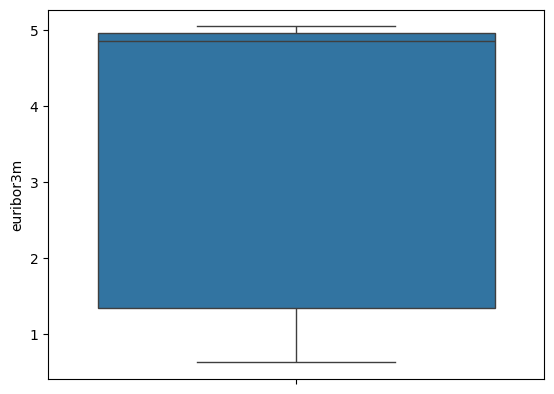

In [41]:
sns.boxplot(df['euribor3m'])

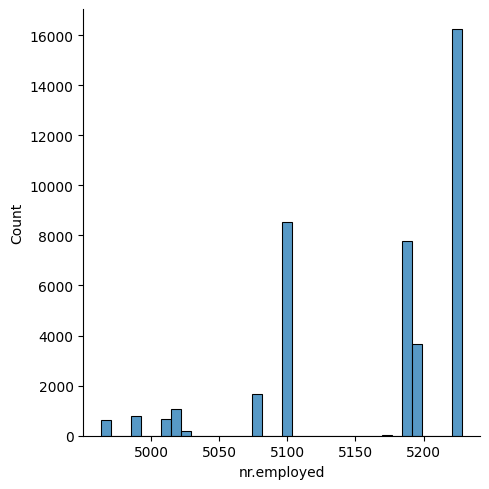

In [42]:
sns.displot(df['nr.employed'])
# sns.lineplot(df['nr.employed'])

<Axes: ylabel='nr.employed'>

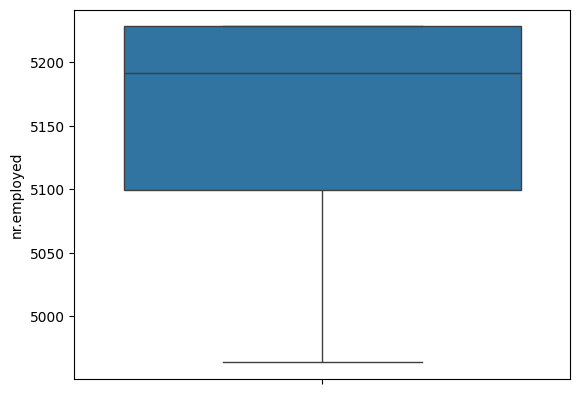

In [43]:
sns.boxplot(df['nr.employed'])

### Remarks

The numerical data (other attributes NOT socioeconomic context attributes) all have outliers and are all right skewed.

Since all the data of the customers is important when it comes to model building, there is no need to remove any data but instead let's perform transformations where we can squeeze the outliers and perform normalisation on the skewed values so as to get a more even distribution.

#### Outliers and skewness

The outlier data is important too as the data needs to be preserved and accounting for skewness.

So now, applying transformaiton on the "other attributes"

age	duration	campaign	pdays	previous

First let's check whether the skewed data needs to be transformed or not.

In [44]:
df['age'].skew()

0.7845602604159753

In [45]:
df['duration'].skew()

3.2628075094947224

In [46]:
df['campaign'].skew()

4.76204406111779

In [98]:
mask = df['pdays'] == 999
new_df = df[~mask]
new_df['pdays'].skew()

1.4585638453665566

In [48]:
df['previous'].skew()

3.831395514122408

All the attributes except for 'age' lie within reasonable bounds for skewness and should be transformed.

'duration'

In [89]:
duration = np.cbrt(df['duration'])
duration.head()

0    6.390677
1    5.301459
2    6.091199
3    5.325074
4    6.745997
Name: duration, dtype: float64

In [90]:
duration.skew()

0.6647171311990077

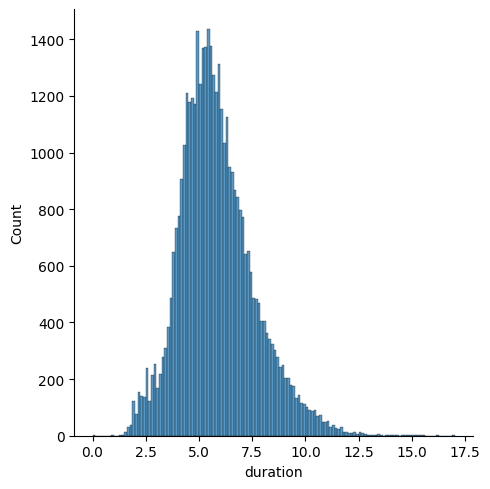

In [91]:
sns.displot(duration)

'campaign'

In [101]:
campaign = np.log(df['campaign'])
campaign.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: campaign, dtype: float64

In [102]:
campaign.skew()

0.9187878417661215

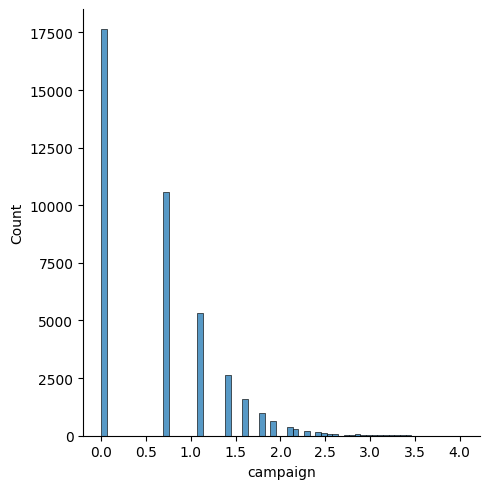

In [103]:
sns.displot(campaign)

'pdays'

In [136]:
limit = new_df['pdays'].quantile(0.01)
limit

1.0

In [139]:
pdays = df['pdays'].replace(999, limit)
pdays = np.sqrt(pdays)
pdays.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: pdays, dtype: float64

In [141]:
pdays.skew()

6.763936200205423

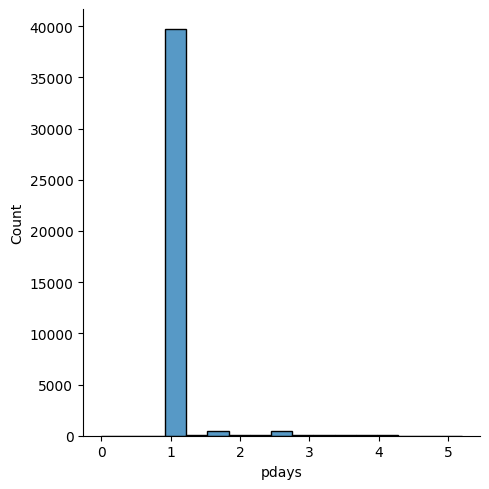

In [140]:
sns.displot(pdays)

'pdays' has an extermely high level of skewness as very few customers were even contacted in the first place.

In [153]:
previous = np.cbrt(df['previous'])
previous.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: previous, dtype: float64

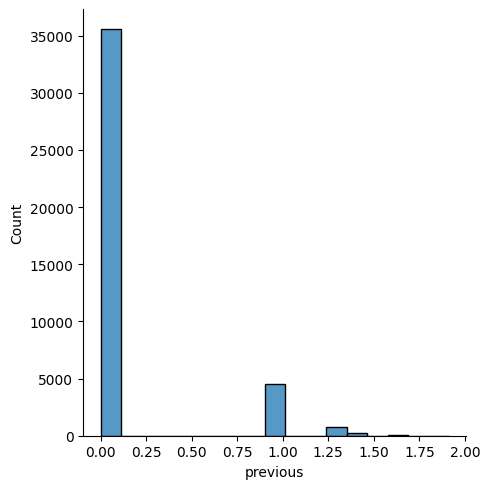

In [154]:
sns.displot(previous)

In [155]:
previous.skew()

2.2168411444807785

it is the same case for 'previous'